Project Proposal: 
"""
The data
The HR department has assembled data on almost 10,000 employees who left the company between 2016-2020. They used information from exit interviews, performance reviews, and employee records.

"department" - the department the employee belongs to.

"promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.

"review" - the composite score the employee received in their last evaluation.

"projects" - how many projects the employee is involved in.

"salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.

"tenure" - how many years the employee has been at the company.

"satisfaction" - a measure of employee satisfaction from surveys.

"bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.

"avghrsmonth" - the average hours the employee worked in a month.

"left" - "yes" if the employee ended up leaving, "no" otherwise.

""" -From kaggle: https://www.kaggle.com/datasets/marikastewart/employee-turnover


# Background
   * Job turnover increasing every year:http://www.deltapeo.com/wp-content/uploads/2021/03/Turnover-%E2%80%98Tsunami-Expected-Once-Pandemic-Ends.pdf
    
   *  Numbers skyrocketed post pandemic 
# Research questions (potential)
   * Does salary have effect on turnover rate?  #Salary vs turnover: ans: No
   * Are certain departments more likely to leave their job? #turnover rate vs department
   * What is the correlation between  hours worked vs satisfaction? hours > avg ; satisfaction < avg = quit?
   * what is the relationship between employee review and likelihood to  leave job?
   * Are people who get bonuses more likely to  stay?
   * Years at company vs salary?
   * Years at company vs promotion?
   * Which is more likely to make people stay: promotion  or  bonus?
    
    
# Analysis
# Conclusion
# Future work

In [2]:
#Load necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [479]:
#Load the  data set  and save as "df"
df = pd.read_csv('employee_churn_data.csv')
df



,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [4]:
#Finding how many different departments there are 
jobs = df.groupby('department')
for item in jobs:
    print(item)
    
#Jobs: IT, admin, engineering, finance, marketing, logistics, operations, retail, sales, support 

('IT',      department  promoted    review  projects  salary  tenure  satisfaction  \
5            IT         0  0.683206         2  medium     5.0      0.565252   
16           IT         0  0.679621         4     low     6.0      0.480245   
38           IT         0  0.707113         4  medium     7.0      0.377903   
58           IT         0  0.695908         2  medium     5.0      0.528461   
60           IT         0  0.581580         3  medium     7.0      0.621281   
...         ...       ...       ...       ...     ...     ...           ...   
9448         IT         0  0.621880         4  medium     8.0      0.550496   
9474         IT         0  0.705368         3  medium     8.0      0.426446   
9499         IT         0  0.728516         3  medium     8.0      0.617219   
9526         IT         0  0.618985         3  medium     8.0      0.447210   
9538         IT         0  0.584446         4  medium     8.0      0.607287   

      bonus  avg_hrs_month left  
5         

In [5]:
#Inspecting df dimensions 
df.shape  #9540 people, 10 columns 

(9540, 10)

In [6]:
#Inspecting df values, count == count, no missing data 
df.describe() 

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [486]:
#Total values of people who left or didn't leave 
df['left'].value_counts()

#Column of just people who left as  true 
df['left_yes'] = (df['left'] == 'yes')

#Column of just people who did not leave  as  true 
df['left_no'] = (df['left'] != 'yes')

In [165]:
#sum each boolean column, divide people who left by total employees
#Find turnover rate 
turn_rate = (df['left_yes'].sum())/(df['left'].value_counts().sum())
turn_rate

0.2918238993710692

In [40]:
#Separate between numeric and categorical columns 
#Numeric values: review, projects, tenure, satisfaction, avg_hours_month
#Categorical: promoted, bonus, left, left_yes, left_no

df_num = df[['review','projects','tenure','satisfaction','avg_hrs_month']]
df_cat = df[['promoted','bonus','left','left_yes','left_no']]


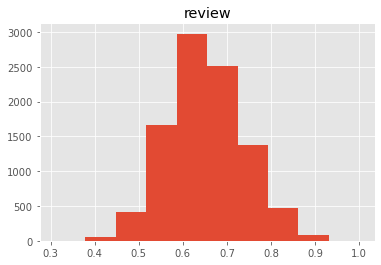

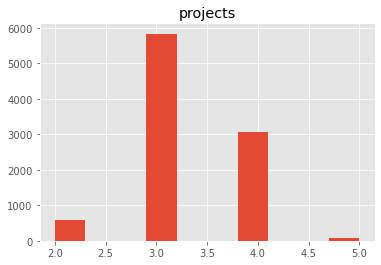

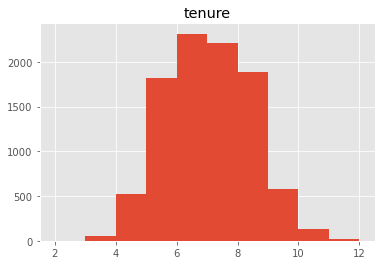

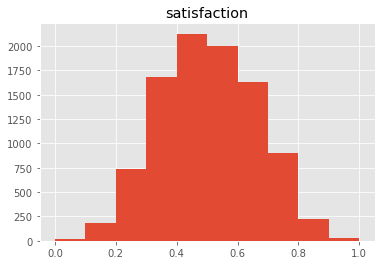

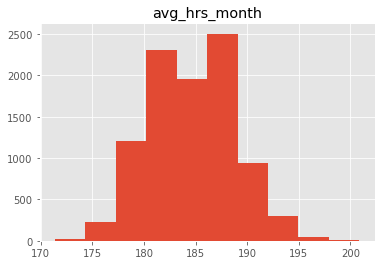

In [42]:
#Quick look at numeric columns distribution, all seem normal 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

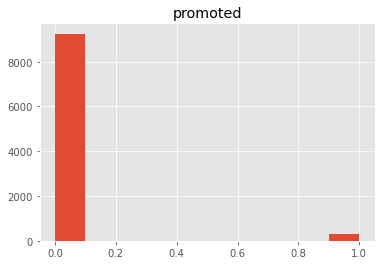

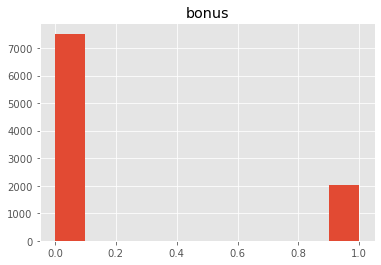

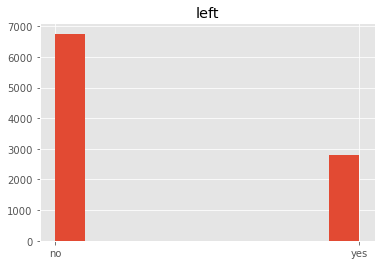

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

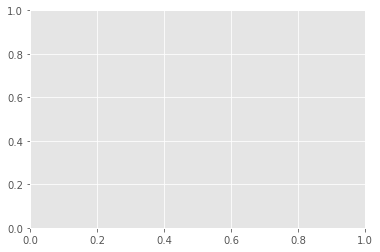

In [46]:
#Quick look aat general ratios in categorical columns of  True vs False 
for i in df_cat.columns:
    plt.hist(df_cat[i])
    plt.title(i)
    plt.show()

# The next chunk of code is data manipulation to get a  feel for working with the data. Skip to next section for code more relevant to the project 

In [157]:
#Correlation between salary and turnover  
#groupby salary and show how many left 

#Group by Salary, showing 'left' column 
df_salary_left = df.groupby('salary')['left']

#Convert to df  
df_salary_left2 = df_salary_left.apply(pd.DataFrame)

#Separate by each salary tier(high,medium,low) and get rid of null values
df_salary_left2_high = df_salary_left2['high'].dropna()
df_salary_left2_medium = df_salary_left2['medium'].dropna()
df_salary_left2_low = df_salary_left2['low'].dropna()

#Convert to df 
df_salary_left2_high2 = df_salary_left2_high.to_frame()
df_salary_left2_medium2 = df_salary_left2_medium.to_frame()
df_salary_left2_low2 = df_salary_left2_low.to_frame()

#Find total amount of rows = total amount of people in each tier 
df_salary_left2_high2.shape #1548 total
df_salary_left2_medium2.shape #6611
df_salary_left2_low2.shape #1381
# total = 9540, matches original df total 


#Convert "yes" "no" to boolean
df_salary_left2_high3 = df_salary_left2_high2['high'] = (df_salary_left2_high2['high'] == 'yes')
df_salary_left2_medium3 = df_salary_left2_medium2['medium'] = (df_salary_left2_medium2['medium'] == 'yes')
df_salary_left2_low3 = df_salary_left2_high2['low'] = (df_salary_left2_low2['low'] == 'yes')

#Sum "True" = how many people left 
df_salary_left2_high3_sum = sum(df_salary_left2_high3) #442
df_salary_left2_medium3_sum = sum(df_salary_left2_medium3) #1951
df_salary_left2_low3_sum = sum(df_salary_left2_low3) #391



#Sum of people who left divided by total people to double check numbers are correct 
(df_salary_left2_high3_sum + df_salary_left2_medium3_sum + df_salary_left2_low3_sum)/(df['left'].value_counts().sum())
# = 0.2918, same turnover rate as earlier 







0.2918238993710692

In [143]:
#df of people who quit from all salary levels 
df_sal_left_sums = pd.DataFrame({'high_quit': [df_salary_left2_high3_sum], 'medium_quit': [df_salary_left2_medium3_sum], 'low_quit': [df_salary_left2_low3_sum]})
df_sal_left_sums

,high,medium,low
0,442,1951,391


In [164]:
#convert to numeric val
df_salary_left2_high2 = df_salary_left2_high.to_frame()
df_salary_left2_medium2 = df_salary_left2_medium.to_frame()
df_salary_left2_low2 = df_salary_left2_low.to_frame()
int(df_salary_left2_high2.count())
int(df_salary_left2_medium2.count())
int(df_salary_left2_low2.count())

#df of total people from all salary levels 
df_sal_left_tot = pd.DataFrame({'high_tot': [int(df_salary_left2_high2.count())], 'medium_tot': [int(df_salary_left2_medium2.count())], 'low_tot': [int(df_salary_left2_low2.count())]})
df_sal_left_tot


,high_tot,medium_tot,low_tot
0,1548,6611,1381


## Does salary have effect on turnover rate? 

In [211]:
#Initial salary vs turnover  rate is also calculate above, but can be done much more efficiently here:

df.groupby('salary')['left_yes'].mean()

salary
high      0.285530
low       0.283128
medium    0.295114
Name: left_yes, dtype: float64

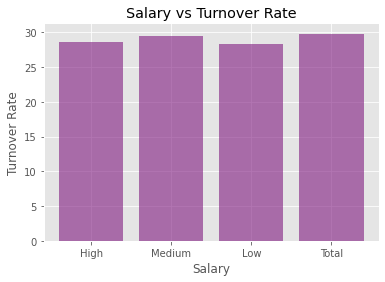

In [202]:
# Set data into variables 

height = [28.55, 29.51, 28.31, 29.81]
bars = ('High', 'Medium', 'Low', 'Total')
x_pos = np.arange(len(bars))
 
# Select bar attributes 
plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add labels 
plt.title('Salary vs Turnover Rate')
plt.xlabel('Salary')
plt.ylabel('Turnover Rate')
 
# plot on x axis 
plt.xticks(x_pos, bars)
 
# Display 
plt.show()

In [203]:
#Stacked bar graph of employment status from all 3 salary levels 
df_stacked = {'Salary': ['High', 'Medium', 'Low', ],
        'Quit': [442, 1951, 391],
        'Employed': [1106, 4660, 990]}
df_stacked = pd.DataFrame.from_dict(df_stacked)

<AxesSubplot:title={'center':'Salary vs Employment Status'}, xlabel='Salary'>

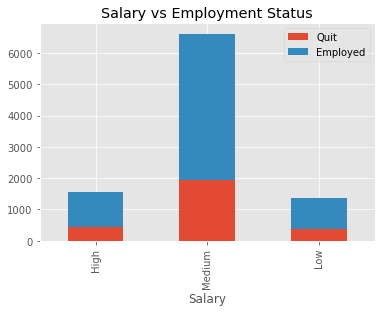

In [204]:
df_stacked.plot.bar(x='Salary', stacked=True, title='Salary vs Employment Status')





 ## Does department have an effect on turnover rate?

In [287]:
#total amount of turn over from all depts = 0.2918
#make into df 
df_turn_total = df['left_yes'].mean()
df_turn_total
df_turn_total1=pd.DataFrame(df_turn_total,index=['department'],columns=['Turnover rate'])
df_turn_total1

,Turnover rate
department,0.291824


In [290]:
#Get df of turnover rate grouped by department 
df_dept_turn = df.groupby('department')['left_yes'].mean().to_frame()
df_dept_turn['Turnover rate'] = df.groupby('department')['left_yes'].mean().to_frame()
 #can you run pearson correlation on this?
    
df_dept_turn = df_dept_turn.drop("left_yes", axis=1)


#append  total turn rate to turn vs department df
df_turn_all_val = df_dept_turn.append(df_turn_total1, ignore_index = False)
df_turn_dep_all_val = df_turn_all_val.rename(index={'department': 'total'})
df_turn_dep_all_val

#plot

df_turn_dep_all_val.plot(kind='bar', title='Department vs Turnover Rate')

,Turnover rate
IT,0.308989
admin,0.281324
engineering,0.288259
finance,0.268657
logistics,0.308333
marketing,0.302993
operations,0.286465
retail,0.305646
sales,0.285183
support,0.288435


<AxesSubplot:title={'center':'Department vs Turnover Rate'}>

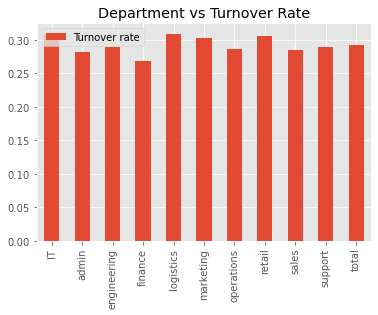

In [300]:
df_turn_dep_all_val.plot(kind='bar', title='Department vs Turnover Rate')

## Satisfaction vs turnover rate

In [530]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


In [543]:
dfprom_hrs_rev_

,Promotion Status,Avg Hours per Month,Avg Review
0,Promotion,184.61,65.27
1,No Promotion,184.66,65.18


In [555]:
import plotly.express as px

px.scatter(dfprom_hrs_rev_, x="Avg Hours per Month", y="Avg Review",
	         size="Avg Hours per Month", color="Promotion Status",
                 hover_name="Promotion Status", size_max=150, log_x=True)


##  What is the correlation between  hours worked vs satisfaction? 
## Is there a higher turnover  rate in people who work more?

In [430]:
#people with lower hhours less likely to leave 
hrs_low = df['avg_hrs_month'].mean()
df_lowhrs_ = df[df['avg_hrs_month'] < hrs_high]
df_lowhrs_['left_yes'].mean()

0.23798579189302133

In [448]:
#people with higher hours more likely to leave 

hrs_high = df['avg_hrs_month'].mean()
df_highhrs_ = df[df['avg_hrs_month'] > hrs_high]
df_highhrs_['left_yes'].mean()

0.346024400504838

In [459]:
#Create df with float results 
df_hours_TR

,Turnover rate
0,23.8
1,34.6


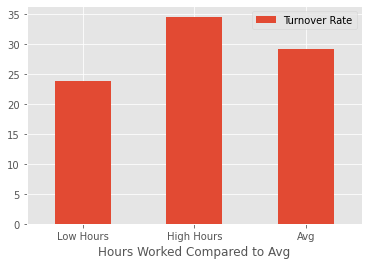

In [492]:
#data_hours_TR = [23.80,34.60]
#df_hours_TR = pd.DataFrame(data_hours_TR, columns=['Turnover rate'])



dff = pd.DataFrame({'Hours Worked Compared to Avg':['Low Hours', 'High Hours', 'Avg'], 'Turnover Rate':[23.80,34.60, 29.18]})
ax = dff.plot.bar(x='Hours Worked Compared to Avg', y='Turnover Rate', rot=0)

In [450]:
#plot above  results 


In [480]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [313]:
import seaborn as sns

In [318]:
from scipy import stats
stats.ttest_ind(df['avg_hrs_month'],df['satisfaction'])

Ttest_indResult(statistic=4336.485551055925, pvalue=0.0)

In [316]:
#correlation coefficient of avg hours worked vs satisfaction. Work more, less happy
corrco_hrs_satis = np.corrcoef(df.avg_hrs_month,df.satisfaction)
corrco_hrs_satis

array([[ 1.        , -0.14314182],
       [-0.14314182,  1.        ]])

/Users/laurentomlinson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


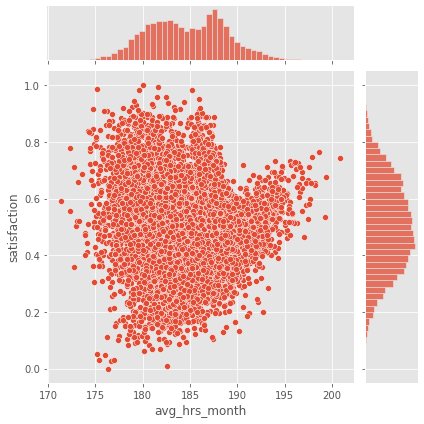

In [314]:
sns.jointplot(df['avg_hrs_month'], df['satisfaction'])

In [319]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


In [334]:
#find avg hrs worked in company + avg satisfaction rating 
avg_hrs = df['avg_hrs_month'].mean()
avg_satis = df['satisfaction'].mean()
#get df subsets of just hhigher than avg hrs and lower than avg hours
df_high_hrs = df[(df['avg_hrs_month']>avg_hrs)]
df_low_hrs = df[(df['avg_hrs_month']<avg_hrs)]
df_low_hrs

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
5,IT,0,0.683206,2,medium,5.0,0.565252,1,178.841879,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8117,operations,0,0.606027,4,medium,6.0,0.166365,0,183.458833,no,False,True
8119,retail,0,0.635259,3,medium,6.0,0.289862,1,183.278960,no,False,True
8129,retail,0,0.659710,4,medium,6.0,0.252366,0,184.215539,no,False,True
8133,logistics,0,0.535823,3,low,6.0,0.182865,0,181.544046,no,False,True


In [338]:
#posiive correlation beween higher hours and higher satisfaction
corrco_high_hrs = np.corrcoef(df_high_hrs.avg_hrs_month,df_high_hrs.satisfaction)

corrco_high_hrs 



array([[1.        , 0.10742911],
       [0.10742911, 1.        ]])

/Users/laurentomlinson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


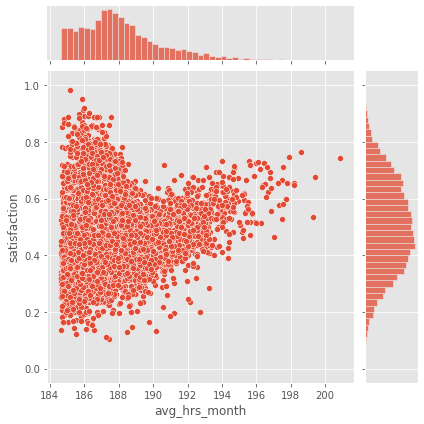

In [332]:
#Plot of higher than avg hours vs satisfaction
sns.jointplot(df_high_hrs['avg_hrs_month'], df['satisfaction'])

In [340]:
#Negative correlation between hours worked and satisfactio
corrco_low_hrs = np.corrcoef(df_low_hrs.avg_hrs_month,df_low_hrs.satisfaction)

corrco_low_hrs 

array([[ 1.        , -0.22448914],
       [-0.22448914,  1.        ]])

/Users/laurentomlinson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


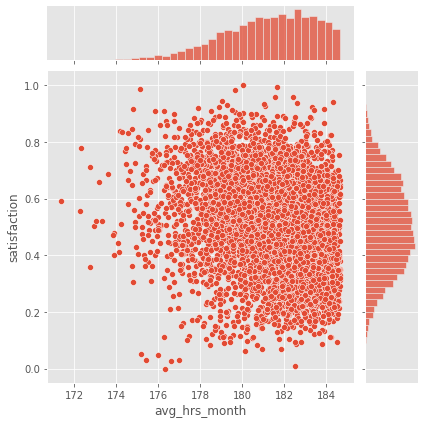

In [335]:
sns.jointplot(df_low_hrs['avg_hrs_month'], df['satisfaction'])

## Hours vs satisfaction by salary

In [342]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


In [347]:
#Get df of just employees in each tier 
dfhigh_salary = df[(df['salary'] == 'high')]
dfmed_salary = df[(df['salary'] == 'medium')]
dflow_salary = df[(df['salary'] == 'low')]

/Users/laurentomlinson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


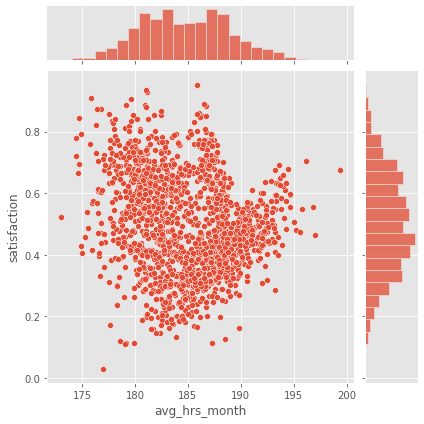

In [345]:
#plot high salary workers avg hours vs satisfaction 

sns.jointplot(dfhigh_salary['avg_hrs_month'], dfhigh_salary['satisfaction'])

In [346]:
#For high salary workers: more they work, less theyre happy 
corrco_highsal_sat = np.corrcoef(dfhigh_salary.avg_hrs_month,dfhigh_salary.satisfaction)

corrco_highsal_sat

array([[ 1.        , -0.17951869],
       [-0.17951869,  1.        ]])

/Users/laurentomlinson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


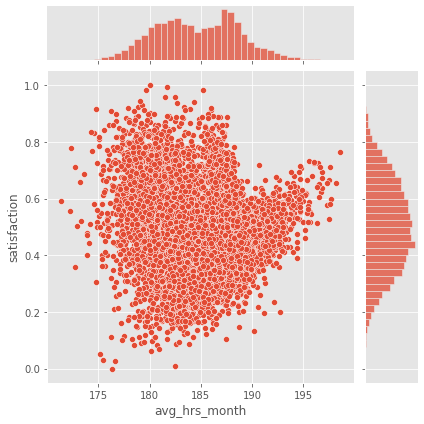

In [348]:
#plot med salary workers avg hours vs satisfaction 
sns.jointplot(dfmed_salary['avg_hrs_month'], dfmed_salary['satisfaction'])

In [349]:
#For medium salary workers: more they work, less theyre happy 
corrco_medsal_sat = np.corrcoef(dfmed_salary.avg_hrs_month,dfmed_salary.satisfaction)

corrco_medsal_sat

array([[ 1.        , -0.13630368],
       [-0.13630368,  1.        ]])

/Users/laurentomlinson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


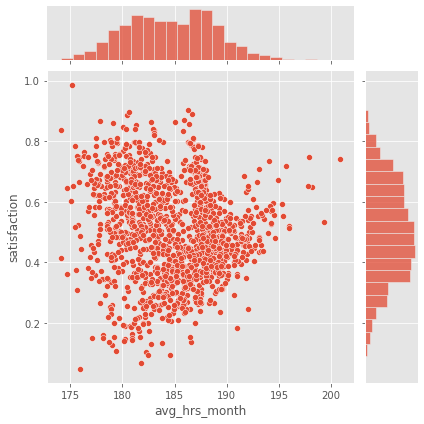

In [350]:
#plot low salary workers avg hours vs satisfaction 
sns.jointplot(dflow_salary['avg_hrs_month'], dflow_salary['satisfaction'])

In [351]:
#For low salary workers: more they work, less theyre happy 
corrco_lowsal_sat = np.corrcoef(dflow_salary.avg_hrs_month,dflow_salary.satisfaction)

corrco_lowsal_sat

array([[ 1.        , -0.13407778],
       [-0.13407778,  1.        ]])

## what is the relationship between employee review and likelihood to leave job?

## employee review vs satisfaction?

In [529]:
#Find turnover rate in people with below avg employee reviews 
rev_high = df['review'].mean()
df_low_rev_ = df[df['review'] < rev_high]
df_low_rev_['left_yes'].mean()
df_low_rev_

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
6,admin,0,0.620158,4,high,5.0,0.686951,0,181.142956,no,False,True
7,support,0,0.499567,4,medium,7.0,0.720451,1,184.977538,no,False,True
9,sales,0,0.642031,3,medium,6.0,0.623365,0,181.851000,no,False,True
10,support,0,0.562675,4,medium,5.0,0.559468,0,178.927194,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9534,engineering,0,0.639663,3,medium,7.0,0.717815,0,187.426777,yes,True,False
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


In [490]:
#Find turnover rate in people with above avg employee reviews 

rev_high = df['review'].mean()
df_high_rev_ = df[df['review'] > rev_high]
df_high_rev_['left_yes'].mean()

0.39706847516954713

In [528]:
df_high_rev_

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
5,IT,0,0.683206,2,medium,5.0,0.565252,1,178.841879,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9530,engineering,0,0.651929,4,low,7.0,0.745873,0,187.114221,yes,True,False
9531,retail,0,0.771905,3,high,8.0,0.619672,0,188.750091,yes,True,False
9532,engineering,0,0.701959,4,medium,8.0,0.645299,0,188.448342,yes,True,False
9533,operations,0,0.711253,4,medium,8.0,0.534439,0,189.241601,yes,True,False


In [527]:
px.scatter(df_rev_satis_graph, y="Turnover Rate", x="Review Compared to Avg", size="Turnover Rate", height=400, log_y=True,title='Review vs Turnover rate')






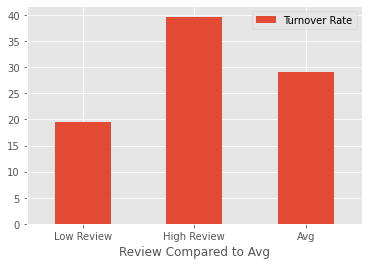

In [495]:
df_rev_satis_graph = pd.DataFrame({'Review Compared to Avg':['Low Review', 'High Review', 'Avg'], 'Turnover Rate':[19.5,39.7, 29.18]})
ax = df_rev_satis_graph.plot.bar(x='Review Compared to Avg', y='Turnover Rate', rot=0)








In [497]:
df_rev_satis_graph

,Review Compared to Avg,Turnover Rate
0,Low Review,19.50
1,High Review,39.70
2,Avg,29.18


In [352]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


In [353]:
#Correlation between employee review and satisfaction
corrco_rev_sat = np.corrcoef(df.review,df.satisfaction)
corrco_rev_sat

array([[ 1.        , -0.34977773],
       [-0.34977773,  1.        ]])

/Users/laurentomlinson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


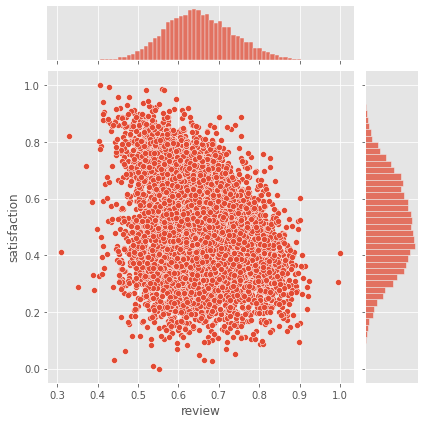

In [354]:
#plot review vs satisfaction. Higher review, less likely to be satisfied 
sns.jointplot(df['review'], df['satisfaction'])

/Users/laurentomlinson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


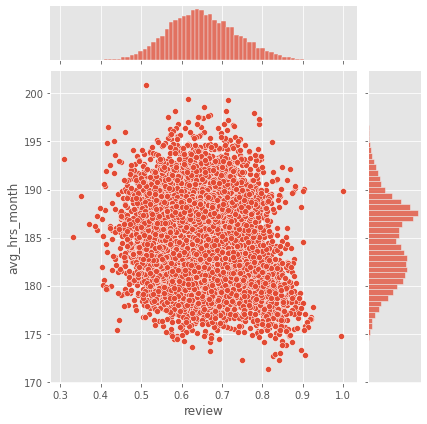

In [359]:
sns.jointplot(df['review'], df['avg_hrs_month'])

In [360]:
#people with higher review worked less 
corrco_rev_hrs = np.corrcoef(df.review,df.avg_hrs_month)
corrco_rev_hrs

array([[ 1.       , -0.1960957],
       [-0.1960957,  1.       ]])

In [362]:
#get all people who quit  
df_rev_quit = df[(df['left_yes'] == True)]
df_rev_quit

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
386,sales,0,0.700577,4,medium,5.0,0.484936,0,180.787350,yes,True,False
785,sales,0,0.738060,4,medium,5.0,0.534547,0,179.534464,yes,True,False
1078,sales,0,0.600301,3,low,6.0,0.657108,0,182.426505,yes,True,False
1155,operations,0,0.722790,3,medium,6.0,0.472769,0,181.921952,yes,True,False
1190,support,0,0.679845,3,medium,4.0,0.543203,0,177.469579,yes,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


<AxesSubplot:xlabel='review', ylabel='satisfaction'>

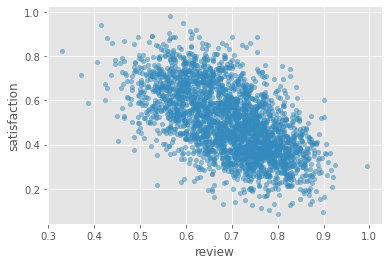

In [364]:
#Of the people who quit, those with better  reviews were less satsfied 
df_rev_quit.plot.scatter(x = 'review', y = 'satisfaction', alpha=.5)

In [367]:
corrco_rev_quit = np.corrcoef(df_rev_quit.review,df_rev_quit.avg_hrs_month)
corrco_rev_quit

array([[ 1.        , -0.60919773],
       [-0.60919773,  1.        ]])

<AxesSubplot:xlabel='review', ylabel='avg_hrs_month'>

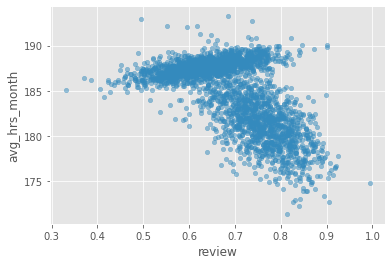

In [366]:
#Of people who quit, people with better reviews worked less
df_rev_quit.plot.scatter(x = 'review', y = 'avg_hrs_month', alpha=.5)

In [368]:
#get all people who didnt quit
df_rev_stayed = df[(df['left_yes'] == False)]
df_rev_stayed

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8607,sales,0,0.570029,3,high,8.0,0.478628,0,187.629598,no,False,True
8675,finance,0,0.556106,3,low,7.0,0.660243,0,186.714146,no,False,True
8890,retail,0,0.661364,3,low,7.0,0.787774,0,187.261857,no,False,True
9165,retail,0,0.659347,3,medium,8.0,0.440098,1,188.663012,no,False,True


In [370]:
#Unclear, but slight negative. review seems to have no correlation on hours worked 
corrco_rev_stayed = np.corrcoef(df_rev_stayed.review,df_rev_stayed.avg_hrs_month)
corrco_rev_stayed

array([[ 1.        , -0.02588183],
       [-0.02588183,  1.        ]])

<AxesSubplot:xlabel='review', ylabel='avg_hrs_month'>

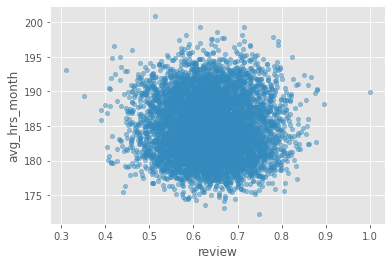

In [369]:
#Of people who stayed, people with better reviews worked less
df_rev_stayed.plot.scatter(x = 'review', y = 'avg_hrs_month', alpha=.5)

## Are people who get bonuses more likely to stay?

In [371]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


In [376]:
#get  all people whogot bonuses 
df_bonus = df[df['bonus'] == 1]

#turnover is simialr 
df_bonus['left_yes'].mean() #.283

0.28175976272862086

In [386]:
#get  all people who did not get bonuses 
df_no_bonus = df[df['bonus'] == 0]

#turnover is simialr 
df_no_bonus['left_yes'].mean() #.2945

0.2945323932419848


## Years at company vs satisfaction?

In [387]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


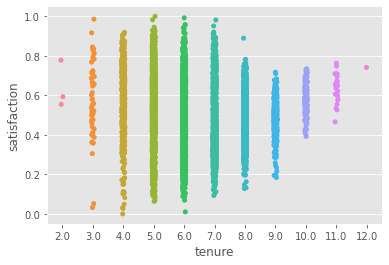

In [401]:
#Satisfaction goes down over  time,  amount of people  goes down with increasing tenure. People don't stay at company long
ax1 = sns.stripplot(x="tenure", y="satisfaction", data=df, jitter=0.05)

In [402]:
#How many people per tenure group
df['tenure'].value_counts()  #most people here (5-9 yrs)

6.0     2313
7.0     2209
8.0     1888
5.0     1823
9.0      578
4.0      518
10.0     127
3.0       57
11.0      23
2.0        3
12.0       1
Name: tenure, dtype: int64

<AxesSubplot:xlabel='satisfaction', ylabel='tenure'>

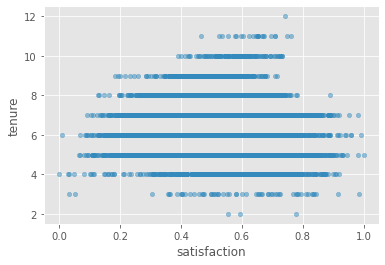

In [389]:
#Plot of satisfaction vs years at company 
df.plot.scatter(x = 'satisfaction', y = 'tenure', alpha=.5)

In [391]:
#People who  are at company longer are less satisfied 
corrco_ten_sat= np.corrcoef(df.tenure,df.satisfaction)
corrco_ten_sat

array([[ 1.        , -0.14624644],
       [-0.14624644,  1.        ]])

In [392]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


## Years at company vs salary?

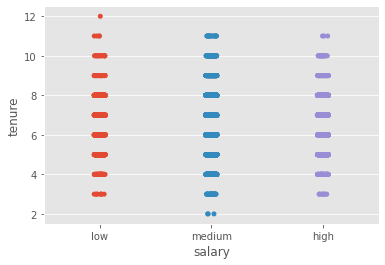

In [398]:
#Amount of years seems to not have that much  affect on salary bracket 
ax = sns.stripplot(x="salary", y="tenure", data=df, jitter=0.05)

## Does promotion have effect on turnover rate

In [399]:
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,False,True
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,False,True
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


In [407]:
#get  all people whogot promoted 
df_prom = df[df['promoted'] == 1]

#turnover is lower  in those  who got promoted 
df_prom['left_yes'].mean() #.197

0.1972318339100346

In [406]:
#get  all people who did not get promoted 
df_noprom = df[df['promoted'] == 0]

#turnover is similar to total 
df_noprom['left_yes'].mean() #.197

0.29477894281699274

In [408]:
#satisfaction avg between promoted vs non promoted vs  total
df_prom['satisfaction'].mean() # 0.49
df['satisfaction'].mean() #0.50 
df_noprom['satisfaction'].mean() #0.505

#more likely to stay but not more likely to be satisfied 

0.4941456183973097

## investigating higher than avg satisfaction

In [415]:
avg_satis = df['satisfaction'].mean()
avg_satis
df_higher_satis = df[df['satisfaction'] > avg_satis]
df_higher_satis

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_yes,left_no
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,False,True
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,False,True
5,IT,0,0.683206,2,medium,5.0,0.565252,1,178.841879,no,False,True
6,admin,0,0.620158,4,high,5.0,0.686951,0,181.142956,no,False,True
7,support,0,0.499567,4,medium,7.0,0.720451,1,184.977538,no,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes,True,False
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes,True,False
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes,True,False
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes,True,False


In [421]:
df['projects'].value_counts()

3    5833
4    3058
2     578
5      71
Name: projects, dtype: int64

In [419]:
df_higher_satis['projects'].value_counts()

3    2863
4    1509
2     277
5      30
Name: projects, dtype: int64

In [423]:
#How long to most people stay at company?
avg_ten = df['tenure'].mean() #6.56 years  

In [426]:
df_high_ten = df[df['tenure'] > avg_ten]
df_low_ten = df[df['tenure'] < avg_ten]

In [428]:
#Does tenure affect whether or not people stay?

#Newer people have lower turnover rate 
df_low_ten['left_yes'].mean() 

0.2384386932541366

In [429]:
df_high_ten['left_yes'].mean() 

0.34397016162453375

## More satisfied less likely to leave?

In [431]:
df_higher_satis['left_yes'].mean()

0.2799743534943364

In [432]:
avg_satis = df['satisfaction'].mean()
avg_satis
df_lower_satis = df[df['satisfaction'] < avg_satis]
df_lower_satis['left_yes'].mean()

0.3032297881094425

## People who are promoted don't work more

In [433]:
df_prom['avg_hrs_month'].mean()

184.61021477340483

In [434]:
df_noprom['avg_hrs_month'].mean()

184.6631754878935

## People who got a promotion don't have higher reviews 

In [435]:
df_prom['review'].mean()

0.6527330226657908

In [436]:
df_noprom['review'].mean()

0.6517979998321138

In [542]:


  
# initialize list of lists
dataprom_ = [['Promotion', 184.61, 65.27], ['No Promotion', 184.66, 65.18]]
  
# Create the pandas DataFrame
dfprom_hrs_rev_ = pd.DataFrame(dataprom_, columns=['Promotion Status', 'Avg Hours per Month','Avg Review'])
  
# print dataframe.


,Promotion Status,Avg Hours per Month,Avg Review
0,Promotion,184.61,65.27
1,No Promotion,184.66,65.18


In [496]:
import plotly.express as px

In [498]:
df_rev_satis_graph

,Review Compared to Avg,Turnover Rate
0,Low Review,19.50
1,High Review,39.70
2,Avg,29.18


In [ ]:
## REVIEW vs TURNOVER plotly graph 

In [506]:
px.bar(df_rev_satis_graph, x="Turnover Rate", hover_name="Review Compared to Avg")




